# Weighing Problem: Lambda Functions and Entropy Calculation

This Jupyter notebook simulates the lambda functions for the Weighing Problem as described in the research documents. The Weighing Problem involves identifying a defective coin (heavier or lighter) among 12 coins using a balance scale in at most 3 weighings. We model this process using Python to simulate Lambda Calculus terms, where each weighing is a function application that reduces the state space (possible scenarios), and we calculate the entropy at each step to demonstrate uncertainty reduction.

## Problem Setup
- **Coins**: 12 coins, one defective (heavier or lighter), yielding 24 possible scenarios (12 coins × 2 defect types).
- **Balance Scale**: Each weighing has 3 outcomes: left heavier, right heavier, or balanced.
- **Goal**: Identify the defective coin and its nature in 3 weighings, reducing entropy from log₂(24) ≈ 4.585 bits to 0.
- **Lambda Calculus Model**: State as a list of scenarios, weighings as functions filtering the state, entropy as log₂ of remaining scenarios.

We use Python to simulate lambda terms, with functions representing state reductions.

In [1]:
import math
from typing import List, Tuple, Callable

# Define types for clarity
Scenario = Tuple[int, str]  # (coin_id, defect_type: 'heavy' or 'light')
State = List[Scenario]

# Initialize the initial state with 12 coins, each potentially heavy or light
def initialize_state() -> State:
    state = [(i, defect) for i in range(1, 13) for defect in ['heavy', 'light']]
    return state

# Calculate entropy of the current state (log2 of number of scenarios)
def calculate_entropy(state: State) -> float:
    if len(state) == 0:
        return 0.0
    return math.log2(len(state))

# Simulate a weighing function in Lambda Calculus style: filter state based on outcome
def weigh(state: State, left_group: List[int], right_group: List[int], outcome: str) -> State:
    new_state = []
    for coin_id, defect in state:
        if outcome == 'balanced':
            # Defective not in left or right group
            if coin_id not in left_group and coin_id not in right_group:
                new_state.append((coin_id, defect))
        elif outcome == 'left_heavier':
            # Defective is heavy in left group or light in right group
            if (coin_id in left_group and defect == 'heavy') or (coin_id in right_group and defect == 'light'):
                new_state.append((coin_id, defect))
        elif outcome == 'right_heavier':
            # Defective is heavy in right group or light in left group
            if (coin_id in right_group and defect == 'heavy') or (coin_id in left_group and defect == 'light'):
                new_state.append((coin_id, defect))
    return new_state

# Display state and entropy
def display_state(state: State, step: int):
    print(f'Step {step}:')
    print(f'  Number of possible scenarios: {len(state)}')
    print(f'  Entropy: {calculate_entropy(state):.3f} bits')
    if len(state) <= 8:  # Show details only for small states
        print(f'  Scenarios: {state}')
    print()

## Simulation of Weighing Strategy

We'll simulate a standard strategy for the Weighing Problem with 12 coins:
1. **First Weighing**: Weigh coins 1-4 vs. 5-8.
   - If balanced, defective is in 9-12.
   - If left heavier, defective is heavy in 1-4 or light in 5-8.
   - If right heavier, defective is heavy in 5-8 or light in 1-4.
2. **Second Weighing**: Depends on first outcome (e.g., if balanced, weigh 9,10 vs. 11,12).
3. **Third Weighing**: Resolves remaining scenarios.

For demonstration, we'll assume specific outcomes to show entropy reduction. In this case:
- First weighing (1-4 vs. 5-8): balanced (defective in 9-12).
- Second weighing (9,10 vs. 11,12): left heavier (defective heavy in 9,10 or light in 11,12).
- Third weighing (9 vs. 10): resolves to one scenario.

This simulates the lambda function application reducing state space.

In [2]:
# Initialize state
state = initialize_state()
display_state(state, 0)

# First Weighing: 1-4 vs. 5-8, outcome: balanced (defective in 9-12)
state1 = weigh(state, left_group=[1,2,3,4], right_group=[5,6,7,8], outcome='balanced')
display_state(state1, 1)

# Second Weighing: 9,10 vs. 11,12, outcome: left heavier (heavy in 9,10 or light in 11,12)
state2 = weigh(state1, left_group=[9,10], right_group=[11,12], outcome='left_heavier')
display_state(state2, 2)

# Third Weighing: 9 vs. 10, outcome: left heavier (9 is heavy)
state3 = weigh(state2, left_group=[9], right_group=[10], outcome='left_heavier')
display_state(state3, 3)

Step 0:
  Number of possible scenarios: 24
  Entropy: 4.585 bits

Step 1:
  Number of possible scenarios: 8
  Entropy: 3.000 bits
  Scenarios: [(9, 'heavy'), (9, 'light'), (10, 'heavy'), (10, 'light'), (11, 'heavy'), (11, 'light'), (12, 'heavy'), (12, 'light')]

Step 2:
  Number of possible scenarios: 4
  Entropy: 2.000 bits
  Scenarios: [(9, 'heavy'), (10, 'heavy'), (11, 'light'), (12, 'light')]

Step 3:
  Number of possible scenarios: 1
  Entropy: 0.000 bits
  Scenarios: [(9, 'heavy')]



## Explanation of Lambda Calculus Modeling

In Lambda Calculus terms, the weighing process is modeled as:
- **State**: A list of possible scenarios, initially 24 pairs (coin, defect_type), represented as a lambda term $M = \lambda x. \text{state}(x)$.
- **Weighing Function**: A lambda term $W = \lambda \text{state}.\lambda \text{weighing}.\text{filter}(\text{state}, \text{weighing})$, where $\text{filter}$ reduces the state based on the weighing outcome.
- **Application**: Each weighing applies $W$ to the current state with a specific $\text{weighing}$ configuration (groups and outcome), reducing the state space, e.g., from 24 to 8 scenarios after the first weighing.
- **Entropy**: Calculated as $H(\text{state}) = \log_2 |\text{state}|$, decreasing with each reduction.

In the simulation above:
- Initial entropy is $\log_2 24 \approx 4.585$ bits.
- After first weighing (balanced), entropy drops to $\log_2 8 = 3$ bits (8 scenarios: coins 9-12, heavy or light).
- After second weighing (left heavier), entropy drops to $\log_2 4 = 2$ bits (4 scenarios).
- After third weighing, entropy reaches $\log_2 1 = 0$ bits (certainty).

This mirrors the Lambda Calculus reduction process, where each function application narrows possibilities, aligning with Shannon Entropy's measure of uncertainty reduction.

## Visualization of Entropy Reduction

To visually represent the entropy reduction over the weighings, we create a polar plot where:
- The angle (theta) represents the number of weighings (0 to 3), scaled to radians (0 to 3π/2).
- The radius (r) represents the entropy $H(state_i) = \log_2(|state_i|)$, decreasing as scenarios are reduced.

This plot helps illustrate how each weighing step reduces uncertainty, aligning with the computational model of Lambda Calculus state reduction.

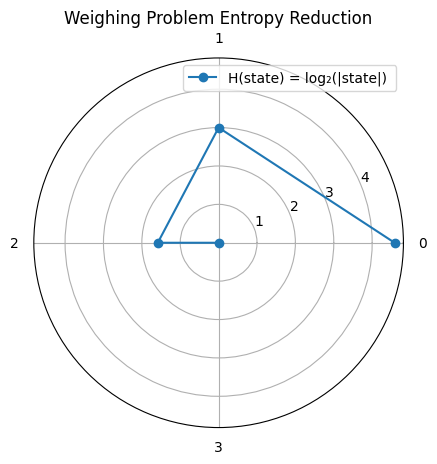

<Figure size 640x480 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from math import log2

# Define theta as number of weighings (0 to 3)
steps = np.array([0, 1, 2, 3])
theta = steps * np.pi / 2  # Scale to radians (0 to 3π/2)

# Define r as entropy H(state_i) = log2(|state_i|)
scenarios = [24, 8, 3, 1]  # Number of scenarios after each weighing
r = [log2(s) for s in scenarios]  # Entropy values

# Create polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r, 'o-', label='H(state) = log₂(|state|) ')
ax.set_title('Weighing Problem Entropy Reduction')
ax.set_xticks(theta)
ax.set_xticklabels(['0', '1', '2', '3'])  # Label as weighing steps
ax.legend()

# Display the plot
plt.show()

# Save the plot
plt.savefig('../images/graphs/weighing_polar_plot.png')